## Content
* [Sequence Models](#1)
* [Recurrent Neural Network (RNN)](#2)
* [Implementing Recurrent Neural Network with Keras](#3)
    * [Loading and Preprocessing Data](#31)
    * [Create RNN Model](#32)
    * [Predictions and Visualising RNN Model](#33)
* [Long Short Term Memory (LSTMs)](#4)
* [Implementing Long Short Term Memory with Keras](#99)
    * [Loading and Visualizing Data](#41)
    * [Preprocessing Data](#42)
    * [Create LSTM Model](#43)
    * [Predictions and Visualising LSTM Model](#44)
* [Conclusion](#6)

<a id="3"></a>
## Implementing Recurrent Neural Network with Keras
* [Loading and Preprocessing Data](#31)
* [Create RNN Model](#32)
* [Predictions and Visualising RNN Model](#33)

<a id="31"></a>
### Loading and Preprocessing Data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train = dataset_train.loc[:, ["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

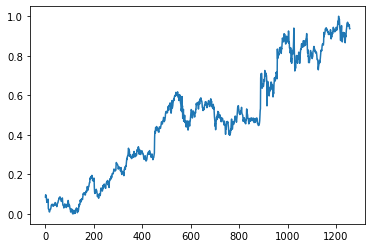

In [6]:
plt.plot(train_scaled)
plt.show()

In [7]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1208, 50, 1)

In [9]:
y_train.shape

(1208,)

<a id="32"></a>
### Create RNN Model

In [10]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 2s 16ms/step - loss: 0.5957
Epoch 2/100
38/38 [==============================] - 1s 16ms/step - loss: 0.3050
Epoch 3/100
38/38 [==============================] - 1s 16ms/step - loss: 0.2176
Epoch 4/100
38/38 [==============================] - 1s 16ms/step - loss: 0.1695
Epoch 5/100
38/38 [==============================] - 1s 16ms/step - loss: 0.1271
Epoch 6/100
38/38 [==============================] - 1s 16ms/step - loss: 0.1127
Epoch 7/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0974
Epoch 8/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0858
Epoch 9/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0725
Epoch 10/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0622
Epoch 11/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0590
Epoch 12/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0518
Epoch 13/100
38/38 [=====

<a id="33"></a>
### Predictions and Visualising RNN Model

In [11]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [12]:
real_stock_price = dataset_test.loc[:, ["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [13]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  # min max scaler
#inputs

1/1 [==============================] - 0s 262ms/step


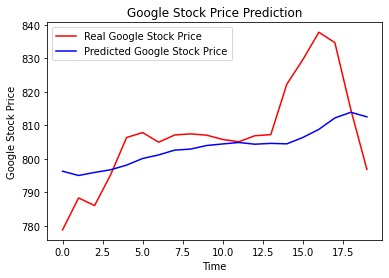

In [14]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
# epoch = 250 daha güzel sonuç veriyor.

### LSTM Model

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)

In [23]:
from keras.layers import LSTM
import keras
lstm_model = Sequential()

lstm_model.add(LSTM(50,return_sequences=True, input_shape=(timesteps,1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)
lstm_model.compile(loss="mean_squared_error", optimizer=opt, metrics=["mae"])

history=lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val,y_val))



Epoch 1/100
34/34 [==============================] - 3s 31ms/step - loss: 0.0521 - mae: 0.1537 - val_loss: 0.0026 - val_mae: 0.0406
Epoch 2/100
34/34 [==============================] - 1s 18ms/step - loss: 0.0042 - mae: 0.0470 - val_loss: 0.0015 - val_mae: 0.0286
Epoch 3/100
34/34 [==============================] - 1s 18ms/step - loss: 0.0030 - mae: 0.0392 - val_loss: 0.0029 - val_mae: 0.0422
Epoch 4/100
34/34 [==============================] - 1s 18ms/step - loss: 0.0031 - mae: 0.0399 - val_loss: 0.0014 - val_mae: 0.0272
Epoch 5/100
34/34 [==============================] - 1s 18ms/step - loss: 0.0026 - mae: 0.0359 - val_loss: 0.0013 - val_mae: 0.0249
Epoch 6/100
34/34 [==============================] - 1s 18ms/step - loss: 0.0024 - mae: 0.0359 - val_loss: 0.0012 - val_mae: 0.0236
Epoch 7/100
34/34 [==============================] - 1s 18ms/step - loss: 0.0025 - mae: 0.0356 - val_loss: 0.0010 - val_mae: 0.0209
Epoch 8/100
34/34 [==============================] - 1s 18ms/step - loss: 0.

https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/

In [46]:
#predicted_stock_price = lstm_model.predict(X_test)
#predicted_stock_price#.reshape()
#predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 425ms/step


In [26]:
results = pd.DataFrame(history.history)
results

,loss,mae,val_loss,val_mae
0,0.052142,0.153687,0.002586,0.040628
1,0.004225,0.046978,0.001530,0.028616
2,0.003000,0.039220,0.002897,0.042164
3,0.003111,0.039949,0.001449,0.027235
4,0.002626,0.035935,0.001272,0.024944
...,...,...,...,...
95,0.000920,0.022538,0.000499,0.012898
96,0.000847,0.021387,0.000508,0.013070
97,0.001109,0.024573,0.000813,0.019630
98,0.001004,0.023307,0.000851,0.020294


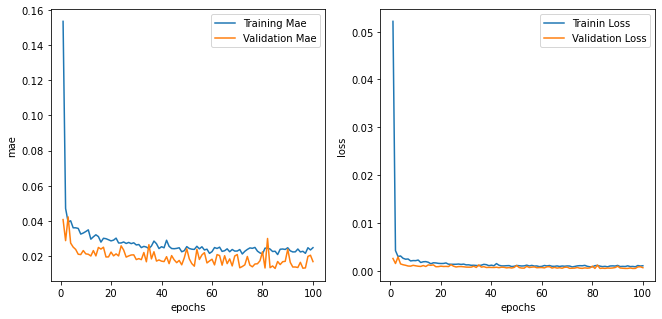

In [27]:
# Plot the loss and accuracy curves for training and validation 
def create_results(history):
    results = pd.DataFrame(history.history)
    plt.figure(figsize=(12,5))
    Train_loss = [i for i in results.loss]
    Validation_loss = [i for i in results.val_loss]
    Train_accuracy=[i for i in results.mae]
    Validation_accuracy=[i for i in results.val_mae]
    epochs= [i for i in range(1,101)]
    plt.subplot(1,2,1)
    plt.subplots_adjust(left=0.1,
                        #bottom=0.1, 
                        right=0.8, 
                        #top=0.9, 
                        wspace=0.2, 
                        hspace=0.2)

    plt.xlabel("epochs")
    plt.ylabel("mae")
    plt.plot(epochs,Train_accuracy,label="Training Mae")
    #plt.legend(loc='Training Accuracy')
    plt.plot(epochs,Validation_accuracy, label="Validation Mae")
    #plt.plot()
    plt.legend()
    plt.subplot(1,2,2)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.plot(epochs,Train_loss, label="Trainin Loss")
    plt.plot(epochs,Validation_loss, label = "Validation Loss")
    plt.legend()
    plt.show()
    return results
results1 = create_results(history)

**There is no overfitting !!**

1/1 [==============================] - 0s 411ms/step


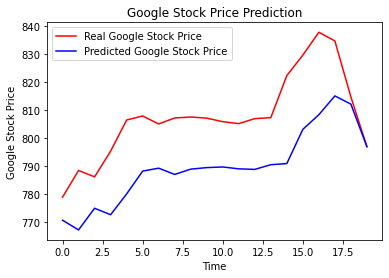

In [28]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = lstm_model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
# epoch = 250

In [29]:
X_train

array([[[0.49890245],
        [0.47531438],
        [0.46147407],
        ...,
        [0.52941067],
        [0.55861671],
        [0.55152913]],

       [[0.52275095],
        [0.53203363],
        [0.68807203],
        ...,
        [0.66091227],
        [0.64714637],
        [0.63793809]],

       [[0.03287075],
        [0.02578317],
        [0.02630404],
        ...,
        [0.07383362],
        [0.07346157],
        [0.07548925]],

       ...,

       [[0.4739936 ],
        [0.48227175],
        [0.48924771],
        ...,
        [0.6097924 ],
        [0.61159685],
        [0.5990029 ]],

       [[0.56274648],
        [0.56661582],
        [0.57437309],
        ...,
        [0.48811295],
        [0.49890245],
        [0.47531438]],

       [[0.9277662 ],
        [0.93444453],
        [0.92493861],
        ...,
        [0.89030062],
        [0.90335962],
        [0.89642086]]])

<a id="4"></a>
## Long Short Term Memory (LSTMs)
* LSTM is variant of RNN.
* LSTM de RNN'den farklı olarak long term memory var. 
* LSTM architecture:
    * x: scaling of information
    * +: Adding information
    * sigmoid layer. Sigmoid memory den bir şeyi hatırlamak için yada unutmak için kullanılır. 1 yada 0'dır.
    * tanh: activation function tanh. Tanh vanishing gradient(yavaş öğrenme - çok küçük gradient) problemini çözer. Çünkü parametreleri update ederken türev alıyorduk. Tanh'ın türevi hemen sıfır'a ulaşmaz.
    * h(t-1): output of LSTM unit
    * c(t-1): memory from previous LSTM unit
    * X(t): input
    * c(t): new updated memory
    * h(t): output
    * From c(t-1) to c(t) is memory pipeline. or only memory.
    * Oklar vektör.
    * h(t-1) ile X(t) birleşmiyor parallel iki yol olarak düşünebilirsiniz.
* ![Time](lstm.jpg)
* 1) Forget gate: input olarak X(t) ve h(t-1) alır. Gelen bilginin unutulup unutulmayacağına karar verir.
* 2) Input gate: Hangi bilginin memory de depolanıp depolanmayacağına karar verir.
* 3) Output gate: Hangi bilginin output olup olmayacağına karar verir.
* Örneğin: 
    * ... "Boys are watching TV"
    * "On the other hand girls are playing baseball."
    * Forget "boys". new input is "girls" and output is "girls"

<a id="99"></a>
## Implementing Long Short Term Memory with Keras
* [Loading and Visualizing Data](#41)
* [Preprocessing Data](#42)
* [Create LSTM Model](#43)
* [Predictions and Visualising LSTM Model](#44)

<a id="41"></a>
### Loading and Visualizing Data

In [17]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [18]:
data = pd.read_csv('international-airline-passengers.csv',skipfooter=5)
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


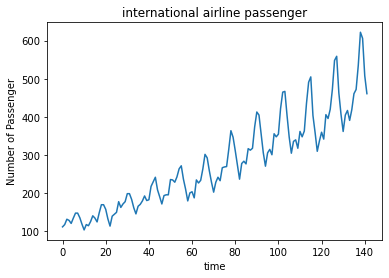

In [19]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

<a id="42"></a>
### Preprocessing Data
* reshape
* change type
* scaling
* train test split
* Create dataset

In [20]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

In [21]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [22]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 71, test size: 71 


In [23]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)  


In [24]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = numpy.array(dataX)
testY = numpy.array(dataY)  

In [25]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

<a id="43"></a>
### Create LSTM Model

In [26]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
60/60 [==============================] - 1s 828us/step - loss: 0.0220
Epoch 2/50
60/60 [==============================] - 0s 797us/step - loss: 0.0047
Epoch 3/50
60/60 [==============================] - 0s 771us/step - loss: 0.0038
Epoch 4/50
60/60 [==============================] - 0s 753us/step - loss: 0.0035
Epoch 5/50
60/60 [==============================] - 0s 783us/step - loss: 0.0033
Epoch 6/50
60/60 [==============================] - 0s 744us/step - loss: 0.0030
Epoch 7/50
60/60 [==============================] - 0s 755us/step - loss: 0.0029
Epoch 8/50
60/60 [==============================] - 0s 751us/step - loss: 0.0028
Epoch 9/50
60/60 [==============================] - 0s 767us/step - loss: 0.0027
Epoch 10/50
60/60 [==============================] - 0s 754us/step - loss: 0.0027
Epoch 11/50
60/60 [==============================] - 0s 749us/step - loss: 0.0025
Epoch 12/50
60/60 [==============================] - 0s 751us/step - loss: 0.0025
Epoch 13/50
60/60 [======

<a id="44"></a>
### Predictions and Visualising LSTM Model

In [27]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 2ms/step
Train Score: 18.80 RMSE
Test Score: 44.41 RMSE


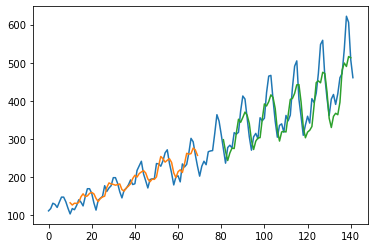

In [28]:
# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()